In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [3]:
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [6]:
accuracy = accuracy_score(y_test, y_pred)

precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

In [7]:
print("Accuracy:", accuracy)

print("\nPrecision (Macro):", precision_macro)
print("Precision (Micro):", precision_micro)
print("Precision (Weighted):", precision_weighted)

print("\nRecall (Macro):", recall_macro)
print("Recall (Micro):", recall_micro)
print("Recall (Weighted):", recall_weighted)

print("\nF1 Score (Macro):", f1_macro)
print("F1 Score (Micro):", f1_micro)
print("F1 Score (Weighted):", f1_weighted)

Accuracy: 0.9157857142857143

Precision (Macro): 0.9149532858779976
Precision (Micro): 0.9157857142857143
Precision (Weighted): 0.915554328838708

Recall (Macro): 0.9145048700694689
Recall (Micro): 0.9157857142857143
Recall (Weighted): 0.9157857142857143

F1 Score (Macro): 0.914645169894678
F1 Score (Micro): 0.9157857142857143
F1 Score (Weighted): 0.9155840493587193


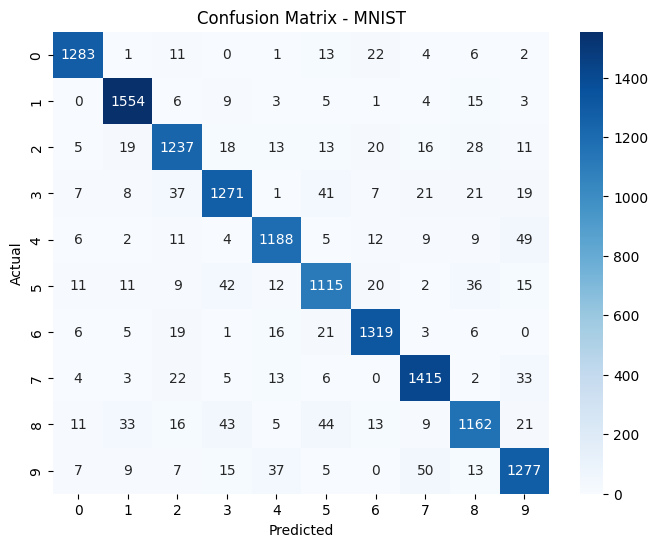

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MNIST")
plt.show()

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.90      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



## FOr decision Tree MOdel

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred_dt = dt_model.predict(X_test)

In [15]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)

precision_macro_dt = precision_score(y_test, y_pred_dt, average='macro')
precision_micro_dt = precision_score(y_test, y_pred_dt, average='micro')
precision_weighted_dt = precision_score(y_test, y_pred_dt, average='weighted')

recall_macro_dt = recall_score(y_test, y_pred_dt, average='macro')
recall_micro_dt = recall_score(y_test, y_pred_dt, average='micro')
recall_weighted_dt = recall_score(y_test, y_pred_dt, average='weighted')

f1_macro_dt = f1_score(y_test, y_pred_dt, average='macro')
f1_micro_dt = f1_score(y_test, y_pred_dt, average='micro')
f1_weighted_dt = f1_score(y_test, y_pred_dt, average='weighted')

In [16]:
print("Decision Tree Accuracy:", accuracy_dt)

print("\nPrecision (Macro):", precision_macro_dt)
print("Precision (Micro):", precision_micro_dt)
print("Precision (Weighted):", precision_weighted_dt)

print("\nRecall (Macro):", recall_macro_dt)
print("Recall (Micro):", recall_micro_dt)
print("Recall (Weighted):", recall_weighted_dt)

print("\nF1 Score (Macro):", f1_macro_dt)
print("F1 Score (Micro):", f1_micro_dt)
print("F1 Score (Weighted):", f1_weighted_dt)

Decision Tree Accuracy: 0.8695

Precision (Macro): 0.8677864215258368
Precision (Micro): 0.8695
Precision (Weighted): 0.869558047682598

Recall (Macro): 0.8676530535028315
Recall (Micro): 0.8695
Recall (Weighted): 0.8695

F1 Score (Macro): 0.8676357407299884
F1 Score (Micro): 0.8695
F1 Score (Weighted): 0.8694472943258491


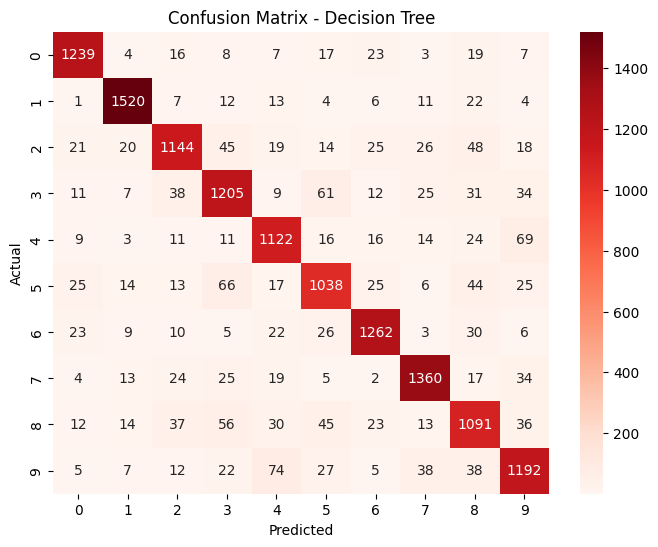

In [17]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### Model Comparison

In [18]:
# Logistic Regression
train_acc_lr = accuracy_score(y_train, model.predict(X_train_scaled))

# Decision Tree
train_acc_dt = accuracy_score(y_train, dt_model.predict(X_train))

In [19]:
import pandas as pd

comparison = {
    "Model": ["Logistic Regression", "Decision Tree"],

    "Train Accuracy": [train_acc_lr, train_acc_dt],
    "Test Accuracy": [accuracy, accuracy_dt],

    "Macro Precision": [precision_macro, precision_macro_dt],
    "Macro Recall": [recall_macro, recall_macro_dt],
    "Macro F1": [f1_macro, f1_macro_dt],

    "Weighted F1": [f1_weighted, f1_weighted_dt]
}

In [20]:
df_results = pd.DataFrame(comparison)
df_results

,Model,Train Accuracy,Test Accuracy,Macro Precision,Macro Recall,Macro F1,Weighted F1
0,Logistic Regression,0.945179,0.915786,0.914953,0.914505,0.914645,0.915584
1,Decision Tree,1.000000,0.869500,0.867786,0.867653,0.867636,0.869447


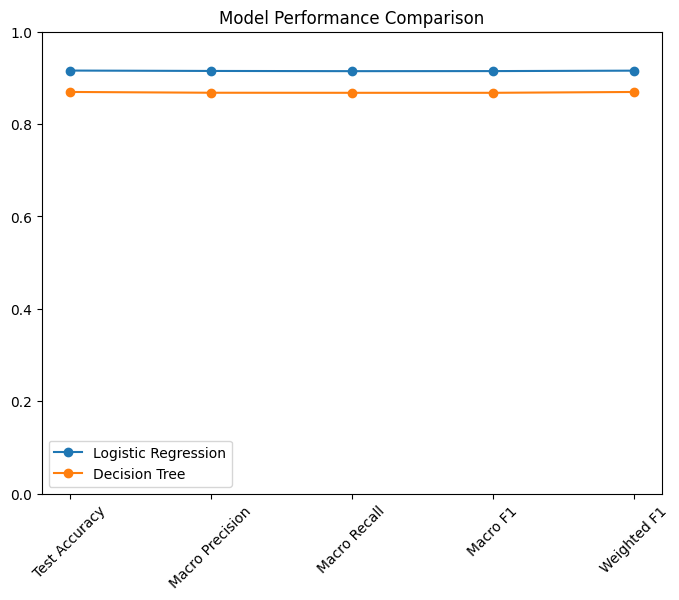

In [21]:
metrics = [
    "Test Accuracy",
    "Macro Precision",
    "Macro Recall",
    "Macro F1",
    "Weighted F1"
]

plt.figure(figsize=(8,6))

for model_name in df_results["Model"]:
    values = df_results[df_results["Model"] == model_name][metrics].values.flatten()
    plt.plot(metrics, values, marker='o', label=model_name)

plt.ylim(0,1)
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.legend()
plt.show()